**Importing Libraries**

In [68]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Layer, Input, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

**Creating custom layer**

In [69]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super(CustomDenseLayer, self).__init__()
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=self.units, initializer='zeros', trainable=True)
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w)+self.b)

**Generating input data**

In [70]:
np.random.seed(42)
X = np.random.rand(1000, 10)
true_weights = np.random.rand(10, 1)
y = X @ true_weights+np.random.normal(0, 0.1, size=(1000, 1))   #y = X + noise

**Split dataset**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Using `FunctionalAPI` to define the layers**

In [72]:
inputs = Input(shape=(10, ))
x = CustomDenseLayer(512)(inputs)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = CustomDenseLayer(256)(x)
x = Dropout(0.5)(x)
output = Dense(1)(x)

**Model building**

In [73]:
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='Adam', metrics='mse')

In [74]:
model.compile(loss='binary_crossentropy', metrics=['mse'], optimizer='Adam')

**Fitting model**

In [75]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 0s 11ms/step - loss: -17.0346 - mse: 3.1936 - val_loss: -24.0880 - val_mse: 9.1390
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: -22.5805 - mse: 16.7650 - val_loss: -24.0880 - val_mse: 21.0815
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: -22.5805 - mse: 22.9927 - val_loss: -24.0880 - val_mse: 23.5636
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: -22.5805 - mse: 23.6361 - val_loss: -24.0880 - val_mse: 23.9400
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: -22.5805 - mse: 24.4375 - val_loss: -24.0880 - val_mse: 23.9927
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: -22.5805 - mse: 24.3987 - val_loss: -24.0880 - val_mse: 23.9998
Epoch 7/50
20/20 [==============================] - 0s 7ms/step - loss: -22.5805 - mse: 25.3701 - val_loss: -24.0880 - val_mse: 24.0007
Epoch 8/50
20/20 [==============================]

**Predict and evaluate the model**

In [76]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.3f}')

7/7 [==============================] - 0s 3ms/step
MSE: 22.824


**Plot the loss**

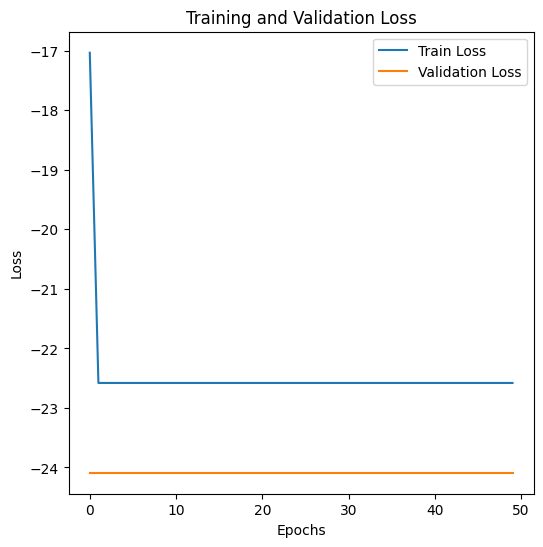

In [78]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()